In [1]:
# import required libraries
import keras                                     # by default, keras will use the tensorflow backend
from keras.datasets import mnist                 # this is the raw data we will be working with
from keras.models import Sequential              # "Sequential" is a simple Keras model for sequential processing
from keras.layers import Dense, Dropout, Flatten # some keras layers
from keras.layers import Conv2D, MaxPooling2D    # some more keras layers
from keras.layers import BatchNormalization      # a more sophisticated layer to speed up training and regularize
from keras import regularizers                   # tools to avoid overfitting
from keras import backend as K                   # a way to get the backing tensorflow library

import math
import numpy as np                               # python's numeric library
from PIL import Image                            # python's image library
from matplotlib import pyplot                    # plotting/image display

# directive to display images and charts inline instead of in a separate window
%matplotlib inline

# for splitting the training data into a training and validation set
import sklearn.model_selection

Using TensorFlow backend.
/data/home/mike/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


54000 training examples
Each image is of size 28x28 and grayscale
Pixel values are from 0 to 255
Labels [0 1 2 3 4 5 6 7 8 9]
10 unique classes (digits)


/data/home/mike/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


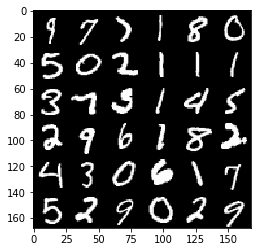

In [2]:
# load the data

# the data, shuffled and split between train, validation, and test sets
(x_train_raw, y_train_raw), (x_test, y_test) = mnist.load_data()
x_train, x_validation, y_train, y_validation = sklearn.model_selection.train_test_split(x_train_raw, y_train_raw, train_size=0.9)
training_example_count, image_height, image_width = x_train.shape
num_classes = len(np.unique(y_train))

print(training_example_count, 'training examples')
print("Each image is of size %dx%d and grayscale" % (image_height, image_width))
print("Pixel values are from %d to %d" % (np.min(x_train), np.max(x_train)))
print("Labels", np.unique(y_train))
print("%d unique classes (digits)" % (num_classes))

def images_square_grid(images):
    """
    Save images as a square grid
    :param images: Images to be used for the grid
    :param mode: The mode to use for images
    :return: Image of images in a square grid
    """
    # Get maximum size for square grid of images
    save_size = math.floor(np.sqrt(images.shape[0]))

    # Put images in a square arrangement
    images_in_square = np.reshape(
            images[:save_size*save_size],
            (save_size, save_size, images.shape[1], images.shape[2]))

    # Combine images to grid image
    new_im = Image.new('L', (images.shape[1] * save_size, images.shape[2] * save_size))
    for col_i, col_images in enumerate(images_in_square):
        for image_i, image in enumerate(col_images):
            im = Image.fromarray(image, 'L')
            new_im.paste(im, (col_i * images.shape[1], image_i * images.shape[2]))

    return np.array(new_im)

images_to_display = 36
random_images = np.array(x_train[np.random.randint(training_example_count, size=images_to_display), :, :])
combined_image = images_square_grid(random_images)

pyplot.imshow(combined_image, cmap='gray')

In [3]:
# reshape the data to image data with a single color channel
x_train = x_train.reshape(training_example_count, image_height, image_width, 1)
x_validation = x_validation.reshape(x_validation.shape[0], image_height, image_width, 1)
x_test = x_test.reshape(x_test.shape[0], image_height, image_width, 1)
input_shape = (image_height, image_width, 1)

# normalize the data to have a mean near 0 and a range near 1
x_train = x_train.astype('float32')
x_validation = x_validation.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_train -= 0.5
x_validation /= 255
x_validation -= 0.5
x_test /= 255
x_test -= 0.5

print("Example normalized image center sample\n", x_train[0, 12:16, 12:16])

Example normalized image center sample
 [[[-0.5       ]
  [-0.06862745]
  [ 0.49215686]
  [ 0.49215686]]

 [[-0.5       ]
  [-0.06862745]
  [ 0.49215686]
  [ 0.49215686]]

 [[-0.5       ]
  [-0.06862745]
  [ 0.49215686]
  [ 0.49215686]]

 [[-0.5       ]
  [-0.06862745]
  [ 0.49215686]
  [ 0.49215686]]]


In [4]:
# convert raw label data into one-hot encoded matrix
y_train_one_hot = keras.utils.to_categorical(y_train, num_classes)
y_validation_one_hot = keras.utils.to_categorical(y_validation, num_classes)
y_test_one_hot = keras.utils.to_categorical(y_test, num_classes)
print("Example one-hot label encoding", y_train_one_hot[0])

Example one-hot label encoding [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


In [5]:
# define the simplest possible model
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(num_classes, activation='softmax'))

In [6]:
# define a model with a hidden layer
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [7]:
# what happens if we add a few hidden layers?
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [8]:
# define a more appropriate model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [9]:
# choose the model optimization
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [14]:
# train

# define training hyperparameters
batch_size = 64   # the number of examples used in each iteration
epochs = 12        # the number of passes through the data

# run the training
model.fit(x_train, y_train_one_hot,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_validation, y_validation_one_hot))

Train on 54000 samples, validate on 6000 samples
Epoch 1/12
54000/54000 [==============================] - 135s 3ms/step - loss: 0.1879 - acc: 0.9811 - val_loss: 0.1566 - val_acc: 0.9882
Epoch 2/12
54000/54000 [==============================] - 135s 3ms/step - loss: 0.1826 - acc: 0.9810 - val_loss: 0.1563 - val_acc: 0.9890
Epoch 3/12
54000/54000 [==============================] - 135s 3ms/step - loss: 0.1802 - acc: 0.9817 - val_loss: 0.1507 - val_acc: 0.9888
Epoch 4/12
54000/54000 [==============================] - 135s 3ms/step - loss: 0.1862 - acc: 0.9804 - val_loss: 0.1620 - val_acc: 0.9882
Epoch 5/12
54000/54000 [==============================] - 135s 3ms/step - loss: 0.1826 - acc: 0.9814 - val_loss: 0.1588 - val_acc: 0.9890
Epoch 6/12
54000/54000 [==============================] - 135s 3ms/step - loss: 0.1838 - acc: 0.9818 - val_loss: 0.1507 - val_acc: 0.9892
Epoch 7/12
54000/54000 [==============================] - 135s 3ms/step - loss: 0.1782 - acc: 0.9819 - val_loss: 0.1552 - v

In [15]:
# evaluate performance on test data

score = model.evaluate(x_test, y_test_one_hot, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.146513682461
Test accuracy: 0.9906


In [13]:
## define a more sophisticated model
# this model will take longer to train but achieve better accuracy
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,
                 kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

batch_size = 64
epochs = 48

# run the training
model.fit(x_train, y_train_one_hot,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_validation, y_validation_one_hot))

score = model.evaluate(x_test, y_test_one_hot, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 54000 samples, validate on 6000 samples
Epoch 1/48
54000/54000 [==============================] - 135s 3ms/step - loss: 0.7188 - acc: 0.9169 - val_loss: 0.3975 - val_acc: 0.9815
Epoch 2/48
54000/54000 [==============================] - 135s 2ms/step - loss: 0.3610 - acc: 0.9699 - val_loss: 0.2662 - val_acc: 0.9822
Epoch 3/48
54000/54000 [==============================] - 135s 2ms/step - loss: 0.2766 - acc: 0.9733 - val_loss: 0.2204 - val_acc: 0.9855
Epoch 4/48
54000/54000 [==============================] - 135s 2ms/step - loss: 0.2528 - acc: 0.9748 - val_loss: 0.2167 - val_acc: 0.9852
Epoch 5/48
54000/54000 [==============================] - 135s 2ms/step - loss: 0.2433 - acc: 0.9773 - val_loss: 0.2178 - val_acc: 0.9837
Epoch 6/48
54000/54000 [==============================] - 135s 2ms/step - loss: 0.2428 - acc: 0.9767 - val_loss: 0.2053 - val_acc: 0.9852
Epoch 7/48
54000/54000 [==============================] - 135s 2ms/step - loss: 0.2364 - acc: 0.9782 - val_loss: 0.2226 - v